In [1]:
import pandas as pd
import numpy as np

from collections import Counter
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.cm as cm

pd.set_option('precision', 2)

In [2]:
exoplanet_data = pd.read_pickle('exoplanet_cluster_input')

CPU times: user 203 ms, sys: 7.79 ms, total: 210 ms
Wall time: 83.9 ms
Silhouette coefficient 0.21777862225270475
Calinski Harabasz_score 127.62440083064278
       cluster_size
count         32.00
mean          11.62
std           11.52
min            1.00
25%            4.00
50%            7.00
75%           15.25
max           50.00


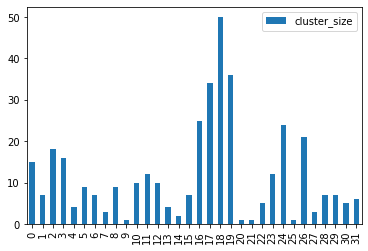

In [4]:
%time ap = AffinityPropagation().fit(exoplanet_data)
print(f'Silhouette coefficient {metrics.silhouette_score(exoplanet_data, ap.labels_, metric="euclidean")}')
print(f'Calinski Harabasz_score {metrics.calinski_harabasz_score(exoplanet_data, ap.labels_)}')

label_counts = dict(sorted(Counter(ap.labels_).items()))
cluster_stats = pd.DataFrame(label_counts.values(), index=label_counts.keys(),columns=['cluster_size'])
print(cluster_stats.describe())
ax = cluster_stats.plot.bar()

In [5]:
# Clusters with one or two members aren't useful
one_member = [x[0] for x in label_counts.items() if x[1]<=2]
print(len(one_member))

5


In [5]:
pca = PCA(n_components=4)
X_r = pca.fit(exoplanet_data).transform(exoplanet_data)
ap2 = AffinityPropagation(preference=-0.95).fit(X_r)
metrics.silhouette_score(X_r, ap2.labels_, metric='euclidean')

0.2478988251983495

In [7]:
cluster_assign = pd.DataFrame(ap.labels_, columns= ['cluster'], index=exoplanet_data.index)
exoplanet_extract = pd.read_pickle('current_exo_ext')
exoplanet_extract['cluster']=np.nan
exoplanet_extract.iloc[exoplanet_data.index]
exoplanet_extract.loc[cluster_assign.index,'cluster']=cluster_assign['cluster']

In [11]:
exoplanet_extract.to_pickle('ap_clustered_exoplanets')

In [12]:
exoplanet_extract.groupby('cluster').agg({'mpl_eqt':['min','max'], 'mpl_dens':['min', 'max'], 
                         'mst_teff':['min','max'],'mpl_massj':['min','max','count']}).sort_values([('mpl_eqt','min'),('mpl_dens','min')])

mpl_eqt         mpl_dens        mst_teff          mpl_massj            \
            min     max      min    max      min      max       min       max   
cluster                                                                         
4.0       199.0   353.0     3.30   5.20   2559.0   3331.0  1.95e-03  2.71e-02   
9.0       206.0   206.0     1.20   1.20   5597.0   5597.0  5.00e-01  5.00e-01   
13.0      235.0   470.0     4.11   7.50   3216.0   5368.0  2.20e-02  7.14e-02   
31.0      243.0   511.0     1.60   5.40   5100.0   5830.0  3.17e-02  1.93e+00   
20.0      262.0   262.0    14.70  14.70   5518.0   5518.0  1.13e-01  1.13e-01   
8.0       288.0   529.0     3.30   6.45   2559.0   3505.0  1.29e-03  7.61e-03   
22.0      381.0   478.0     0.03   0.86   5600.0   6018.0  1.30e-02  1.02e+00   
15.0      490.0   955.0     2.00   7.40   4285.0   5854.0  2.55e-02  7.71e-02   
6.0       497.0   752.0     0.03   2.13   5026.0   6302.0  7.00e-03  1.84e+00   
21.0      543.0   543.0    14.00  14.00   5155.0   5155.0  6.00e+00  6.00e+00   
16.0      594.0  1084.0     0.19   1.30   3600.0   5495.0  4.37e-02  9.74e-01   
1.0       600.0  1017.0     2.32   3.70   4650.0   6090.0  8.63e-01  2.96e+00   
28.0      610.0  1224.0     6.10  12.70   3331.0   4916.0  3.18e-03  2.52e-02   
30.0      628.0   984.0     0.30   1.01   5026.0   6327.0  4.78e-02  3.34e-01   
14.0      701.0  1173.0    31.93  33.10   4640.0   5854.0  1.16e-02  1.20e-02   
3.0       741.0  1230.0     0.84   4.10   4775.0   6302.0  1.52e-02  1.00e+00   
29.0      767.0  1710.0     5.10  13.78   4595.0   6424.0  5.20e+00  1.04e+01   
11.0      782.0  2025.0     4.70  12.65   4699.0   6327.0  1.00e-02  6.70e-02   
5.0       858.0  1880.0     2.84   7.00   4675.0   6509.0  2.74e+00  6.10e+00   
10.0      885.0  1228.0     0.16   1.62   5430.0   6190.0  3.80e-02  9.80e-01   
25.0      897.0   897.0    13.00  13.00   6350.0   6350.0  2.01e+01  2.01e+01   
24.0     1053.0  1650.0     0.76   3.08   4900.0   6272.0  7.05e-02  2.13e+00   
18.0     1092.0  1652.0     0.08   1.45   5000.0   6600.0  1.38e-01  1.07e+00   
19.0     1120.0  1752.0     0.09   0.96   5510.0   7175.0  1.01e-01  1.04e+00   
26.0     1134.0  1834.0     0.71   1.97   4309.0   6010.0  1.09e+00  2.49e+00   
2.0      1226.0  1700.0     0.99   3.10   5440.0   6510.0  1.31e+00  4.19e+00   
17.0     1561.0  2470.0     0.10   0.88   5650.0   9360.0  5.27e-01  2.11e+00   
12.0     1577.0  2570.0     0.62   2.34   6360.0   8720.0  2.82e+00  6.78e+00   
27.0     1650.0  2130.0     3.45   9.15   5143.0   5978.0  1.45e-02  6.48e-02   
0.0      1669.0  2132.0     0.05   0.77   4550.0   6900.0  3.40e-01  1.51e+00   
7.0      1952.0  2730.0     3.60   7.30   6035.0   7930.0  7.60e+00  1.29e+01   
23.0     2000.0  4050.0     0.24   1.20   5000.0  10170.0  1.07e+00  2.88e+00   

               
        count  
cluster        
4.0         4  
9.0         1  
13.0        4  
31.0        6  
20.0        1  
8.0         9  
22.0        5  
15.0        7  
6.0         7  
21.0        1  
16.0       25  
1.0         7  
28.0        7  
30.0        5  
14.0        2  
3.0        16  
29.0        7  
11.0       12  
5.0         9  
10.0       10  
25.0        1  
24.0       24  
18.0       50  
19.0       36  
26.0       21  
2.0        18  
17.0       34  
12.0       10  
27.0        3  
0.0        15  
7.0         3  
23.0       12

In [1]:
exoplanet_extract[exoplanet_extract['cluster']==31][['mpl_hostname','mpl_letter','mpl_orbper','mpl_orbsmax',
                                                    'mpl_massj','mpl_radj','mpl_dens','mpl_eqt','mst_teff',
                                                    'mst_mass','mst_rad','mst_age','cluster']].describe()

NameError: name 'exoplanet_extract' is not defined

In [8]:
exoplanet_extract[['mpl_hostname','mpl_letter','mpl_orbper','mpl_orbsmax',
                                                    'mpl_massj','mpl_radj','mpl_dens','mpl_eqt','mst_teff',
                                                    'mst_mass','mst_rad','mst_age','cluster']].describe()

,mpl_orbper,mpl_orbsmax,mpl_massj,mpl_radj,mpl_dens,mpl_eqt,mst_teff,mst_mass,mst_rad,mst_age,cluster
count,4.04e+03,2.47e+03,9.44e+02,3189.00,530.00,701.00,3805.00,3.40e+03,3731.00,2.10e+03,372.00
mean,2.14e+03,9.03e+00,2.13e+00,0.38,2.58,1117.50,5459.24,9.90e-01,1.55,4.18e+00,15.55
std,1.15e+05,1.21e+02,4.24e+00,0.43,5.04,575.49,1320.43,4.87e-01,3.85,2.19e+00,8.31
min,9.07e-02,4.40e-03,6.00e-05,0.03,0.03,50.00,575.00,9.40e-03,0.04,1.00e-03,0.00
25%,4.46e+00,5.61e-02,5.66e-02,0.14,0.43,660.00,5017.00,8.10e-01,0.80,2.95e+00,10.00
50%,1.18e+01,1.17e-01,6.42e-01,0.21,1.03,1070.00,5594.00,9.64e-01,0.97,4.07e+00,17.00
75%,4.23e+01,6.79e-01,1.87e+00,0.33,2.83,1516.00,5922.00,1.12e+00,1.26,4.79e+00,19.25
max,7.30e+06,3.50e+03,3.00e+01,6.90,77.70,4050.00,40000.00,1.09e+01,83.80,1.49e+01,31.00


In [9]:
exoplanet_extract[['mpl_hostname','mpl_letter','mpl_orbper','mpl_orbsmax',
                                                    'mpl_massj','mpl_radj','mpl_dens','mpl_eqt','mst_teff',
                                                    'mst_mass','mst_rad','mst_age','cluster']].iloc[1058]

mpl_hostname    LTT 1445 A
mpl_letter               b
mpl_orbper             5.4
mpl_orbsmax          0.038
mpl_massj           0.0069
mpl_radj              0.12
mpl_dens               4.4
mpl_eqt            4.3e+02
mst_teff           3.3e+03
mst_mass              0.26
mst_rad               0.28
mst_age                NaN
cluster                  8
Name: 1058, dtype: object